<a href="https://colab.research.google.com/github/manarhelmy9847/DeepCT/blob/main/CT_Scan_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CT: Computerized Tomography Scan Diagnosis**


class 0 = Cyst

class 1 = Normal

class 2 = Stone

class 3 = Tumor

In [1]:
classes = {0 : 'Cyst',
           1 : 'Normal',
           2 : 'Stone',
           3 : 'Tumor'}

In [2]:
classes[0]

'Cyst'

---

importing libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Use tensorflow.keras for ImageDataGenerator
from tensorflow.keras.applications import vgg16 # Changed location to tensorflow.keras.applications
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout # Use tensorflow.keras for layers
from tensorflow.keras.models import Sequential # Use tensorflow.keras for models
from tensorflow.keras.layers import Dense, Input, Flatten # Use tensorflow.keras for layers
from tensorflow.keras.utils import load_img, img_to_array # Use tensorflow.keras for utils
from sklearn.metrics import confusion_matrix

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [5]:
!kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone

Dataset URL: https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone
License(s): copyright-authors
 99% 1.50G/1.52G [00:21<00:00, 34.3MB/s]
100% 1.52G/1.52G [00:21<00:00, 76.1MB/s]


In [6]:
!unzip -q /content/ct-kidney-dataset-normal-cyst-tumor-and-stone.zip

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_data = train_datagen.flow_from_directory('/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')
test_data = train_datagen.flow_from_directory('/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False,
                                              subset='validation')

Found 11204 images belonging to 4 classes.
Found 1242 images belonging to 4 classes.


In [8]:
test_data.labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [9]:
train_data.image_shape

(224, 224, 3)

In [10]:
np.unique(test_data.labels)

array([0, 1, 2, 3], dtype=int32)

In [11]:
train_data.class_indices

{'Cyst': 0, 'Normal': 1, 'Stone': 2, 'Tumor': 3}

# Model VGG 16 Arcitecture

In [12]:
vgg16_model = vgg16.VGG16(include_top=False, input_shape=(224,224,3))
vgg16_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
for layer in vgg16_model.layers[:]:
  layer.trainable = False
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │        16,388 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,276,932 (512.23 MB)

 Trainable params: 119,562,244 (456.09 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:
len(train_data.labels)

11204

In [16]:
model2 = model

### Retrain the model

In [17]:
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
model2.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

results2 = model2.fit(train_data, epochs=5, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks=EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)
                  )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 97s 234ms/step - accuracy: 0.7846 - loss: 2.9243 - val_accuracy: 0.7262 - val_loss: 1.0646
Epoch 2/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 70s 200ms/step - accuracy: 0.9840 - loss: 0.0515 - val_accuracy: 0.8969 - val_loss: 0.6707
Epoch 3/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 83s 202ms/step - accuracy: 0.9940 - loss: 0.0171 - val_accuracy: 0.7480 - val_loss: 1.2124
Epoch 4/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 86s 212ms/step - accuracy: 0.9888 - loss: 0.0410 - val_accuracy: 0.7480 - val_loss: 1.3712
Epoch 5/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 72s 203ms/step - accuracy: 0.9965 - loss: 0.0118 - val_accuracy: 0.8543 - val_loss: 0.9152


In [18]:
loss, acc = model2.evaluate(test_data)

39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.9157 - loss: 0.5787


In [19]:
print('Test accuracy = ',round(acc*100,2),'%\nLoss = ',loss ,sep='')

Test accuracy = 89.69%
Loss = 0.6707473397254944


In [20]:
results2.history['val_loss']

[1.0646024942398071,
 0.6707473397254944,
 1.212415099143982,
 1.3711662292480469,
 0.915186882019043]

In [21]:
results2.history['val_accuracy']

[0.7262479662895203,
 0.8969404101371765,
 0.7479870915412903,
 0.7479870915412903,
 0.8542672991752625]

In [22]:
i = results2.history['val_accuracy'].index(acc)
i

1

In [23]:
results2.history['val_accuracy'][i]

0.8969404101371765

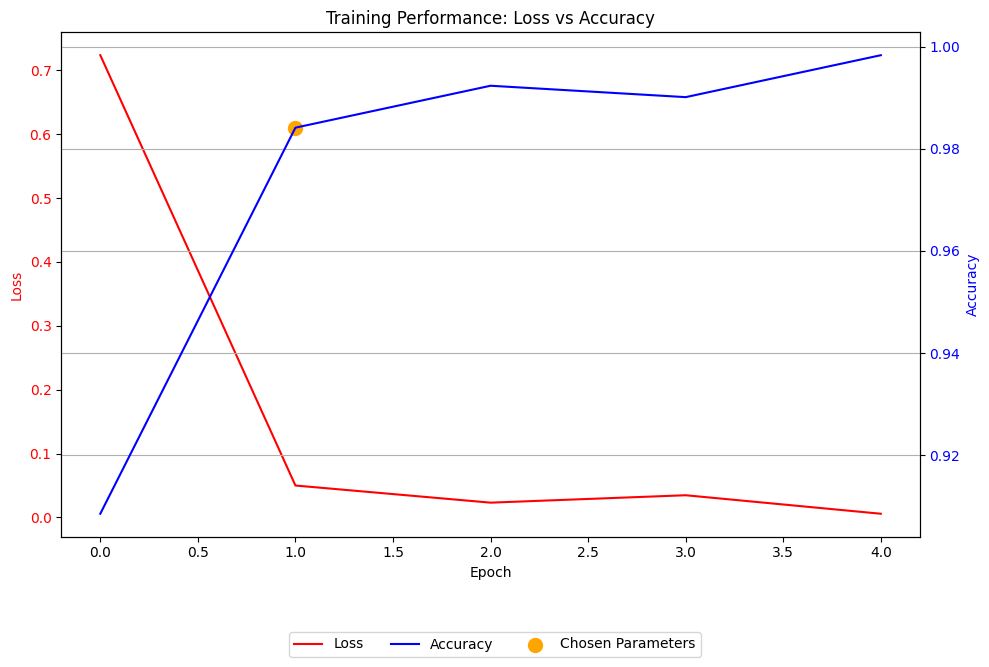

In [25]:
fig, ax1 = plt.subplots(figsize=(10, 6))

#  loss
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='red')
ax1.plot(results2.history['loss'], color='red', label='Loss')
ax1.tick_params(axis='y', labelcolor='red')

#  accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='blue')
ax2.plot(results2.history['accuracy'], color='blue', label='Accuracy')
ax2.scatter(i, results2.history['accuracy'][i], color='orange', label='Chosen Parameters', marker='o', s=100)
ax2.tick_params(axis='y', labelcolor='blue')


plt.title("Training Performance: Loss vs Accuracy")
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()


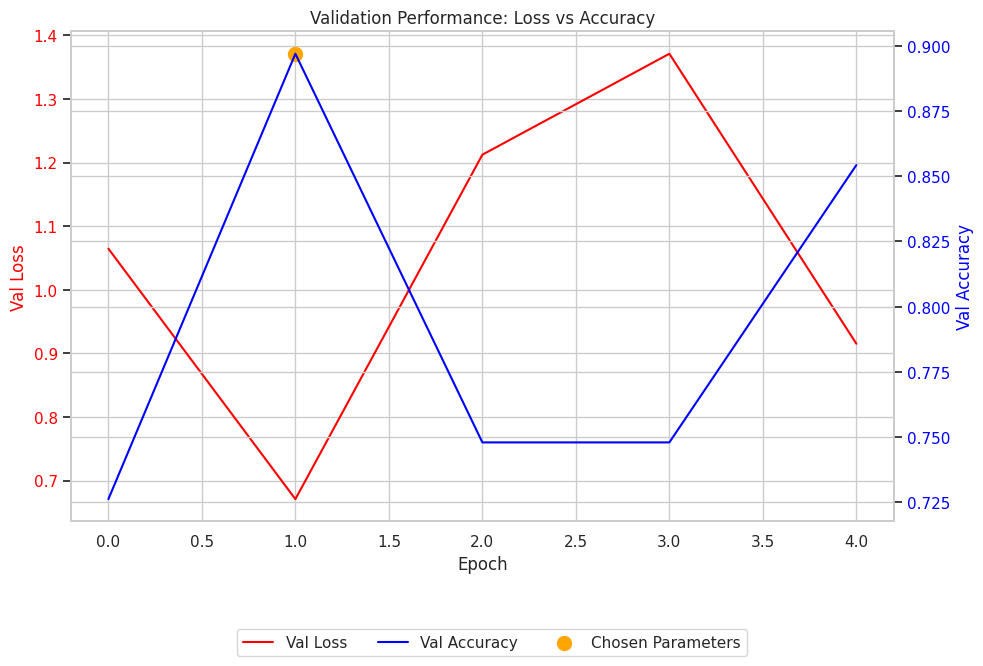

In [32]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# val_loss
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Val Loss', color='red')
ax1.plot(results2.history['val_loss'], color='red', label='Val Loss')
ax1.tick_params(axis='y', labelcolor='red')

# val_accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Val Accuracy', color='blue')
ax2.plot(results2.history['val_accuracy'], color='blue', label='Val Accuracy')
ax2.scatter(i, results2.history['val_accuracy'][i], color='orange', label='Chosen Parameters', marker='o', s=100)
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("Validation Performance: Loss vs Accuracy")
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()


---

# Model: Dense Net 201 Arcitecture
(Best accuracy)

In [33]:
from keras.applications.densenet import DenseNet201
new_input = Input(shape=(224, 224, 3))
base_model = DenseNet201(weights='imagenet', include_top=False, input_tensor=new_input)
base_model.summary()

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "densenet201"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 18,321,984 (69.89 MB)

 Trainable params: 18,092,928 (69.02 MB)

 Non-trainable params: 229,056 (894.75 KB)

In [34]:
for layer in base_model.layers[:]:
  layer.trainable = False
base_model.summary()

Model: "densenet201"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 18,321,984 (69.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 18,321,984 (69.89 MB)

In [35]:
model3 = Sequential()
model3.add(base_model)
model3.add(Flatten())
model3.add(Dense(1000, activation='relu'))
model3.add(Dense(1000, activation='relu'))
model3.add(Dense(4, activation='softmax'))
model3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)        │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 94080)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1000)           │    94,081,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,407,988 (432.62 MB)

 Trainable params: 95,086,004 (362.72 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [36]:
from keras.optimizers import Adam
model3.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
results3 = model3.fit(train_data, epochs=5, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks = EarlyStopping(patience=5, monitor='val_accuracy',restore_best_weights=True)
                  )

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_40']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


351/351 ━━━━━━━━━━━━━━━━━━━━ 168s 344ms/step - accuracy: 0.7742 - loss: 8.3801 - val_accuracy: 0.8929 - val_loss: 0.3313
Epoch 2/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 114s 165ms/step - accuracy: 0.9942 - loss: 0.0139 - val_accuracy: 0.8945 - val_loss: 0.3702
Epoch 3/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 60s 169ms/step - accuracy: 0.9633 - loss: 0.1621 - val_accuracy: 0.9090 - val_loss: 0.3689
Epoch 4/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 60s 170ms/step - accuracy: 0.9980 - loss: 0.0071 - val_accuracy: 0.9404 - val_loss: 0.2378
Epoch 5/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 63s 178ms/step - accuracy: 0.9940 - loss: 0.0226 - val_accuracy: 0.9074 - val_loss: 0.3117


In [37]:
loss3, acc3 = model3.evaluate(test_data)

39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.9280 - loss: 0.3058


In [38]:
print("Test Accuracy:",round(acc3*100,2),"%","\nTest Loss:",loss3)

Test Accuracy: 94.04 % 
Test Loss: 0.2378336787223816


In [39]:
results3.history['val_accuracy']

[0.8929146528244019,
 0.8945249319076538,
 0.9090177416801453,
 0.9404186606407166,
 0.9074074029922485]

In [40]:
results3.history['val_loss']

[0.3312854766845703,
 0.370192289352417,
 0.36887091398239136,
 0.2378336787223816,
 0.31172969937324524]

In [41]:
i = results3.history['val_loss'].index(loss3)
i

3

In [42]:
results3.history['val_accuracy'][i]

0.9404186606407166

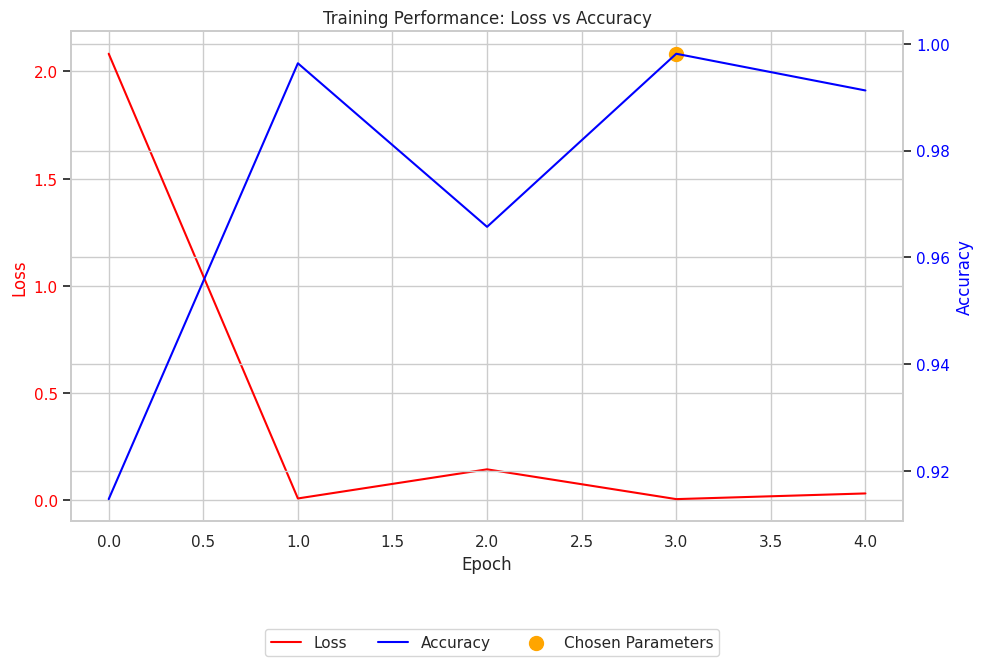

In [44]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# loss
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='red')
ax1.plot(results3.history['loss'], color='red', label='Loss')
ax1.tick_params(axis='y', labelcolor='red')

# accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='blue')
ax2.plot(results3.history['accuracy'], color='blue', label='Accuracy')
ax2.scatter(i, results3.history['accuracy'][i], color='orange', marker='o', label='Chosen Parameters', s=100)
ax2.tick_params(axis='y', labelcolor='blue')


plt.title("Training Performance: Loss vs Accuracy")
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()


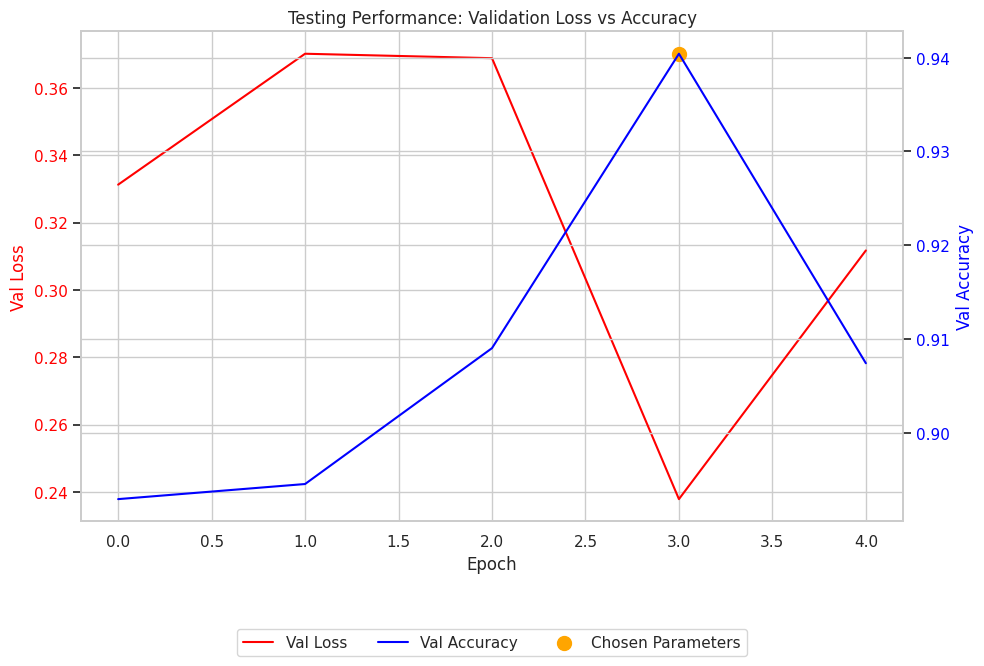

In [45]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# val_loss
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Val Loss', color='red')
ax1.plot(results3.history['val_loss'], color='red', label='Val Loss')
ax1.tick_params(axis='y', labelcolor='red')

# val_accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Val Accuracy', color='blue')
ax2.plot(results3.history['val_accuracy'], color='blue', label='Val Accuracy')
ax2.scatter(i, results3.history['val_accuracy'][i], color='orange', marker='o', label='Chosen Parameters', s=100)
ax2.tick_params(axis='y', labelcolor='blue')


plt.title("Testing Performance: Validation Loss vs Accuracy")
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()


---

In [46]:
yp = model3.predict(test_data)
yp

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_40']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


39/39 ━━━━━━━━━━━━━━━━━━━━ 44s 645ms/step


array([[1.00000000e+00, 3.86370996e-14, 1.06024225e-13, 1.32577491e-16],
       [1.00000000e+00, 2.05498430e-15, 1.03318309e-11, 1.90228280e-12],
       [9.99999762e-01, 4.02485902e-08, 6.40945501e-08, 1.21182694e-07],
       ...,
       [6.12204240e-05, 9.16386398e-06, 5.94022322e-06, 9.99923706e-01],
       [3.10427299e-06, 4.34030255e-07, 6.37794528e-07, 9.99995828e-01],
       [5.75524655e-06, 2.93169819e-06, 6.00490193e-06, 9.99985218e-01]],
      dtype=float32)

In [47]:
yp = yp.argmax(axis=1)
yp

array([0, 0, 0, ..., 3, 3, 3])

In [48]:
yp.shape

(1242,)

In [49]:
df = pd.DataFrame({'filename':test_data.filenames,'y_actual':test_data.classes,'Y_pred':yp})
df

,filename,y_actual,Y_pred
0,Cyst/Cyst- (1).jpg,0,0
1,Cyst/Cyst- (10).jpg,0,0
2,Cyst/Cyst- (100).jpg,0,0
3,Cyst/Cyst- (1000).jpg,0,0
4,Cyst/Cyst- (1001).jpg,0,0
...,...,...,...
1237,Tumor/Tumor- (12).jpg,3,3
1238,Tumor/Tumor- (120).jpg,3,3
1239,Tumor/Tumor- (1200).jpg,3,3
1240,Tumor/Tumor- (1201).jpg,3,3


In [50]:
test_data.labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [51]:
m = confusion_matrix(test_data.labels,yp)
m

array([[347,   1,  22,   0],
       [  2, 487,   2,  16],
       [  6,   9, 122,   0],
       [ 16,   0,   0, 212]])

Heatmap



<Axes: xlabel='Predicted', ylabel='Actual'>

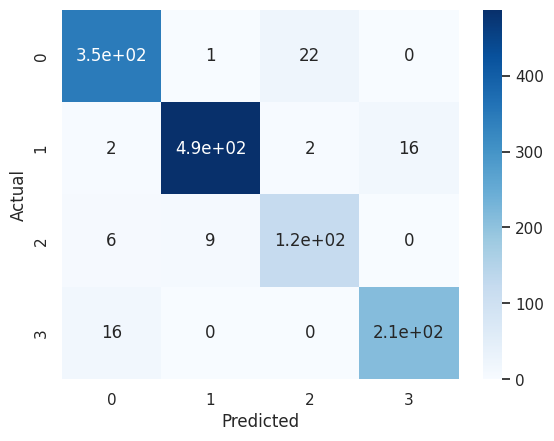

In [52]:
print("Heatmap\n")
m = pd.crosstab(test_data.labels, yp, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m,annot=True, cmap='Blues')

---

In [53]:
model3.save('ct_scan_model.h5')